### Análisis del clima en Chicago en noviembre de 2017
Objetivo: Escribir un código SQL para analizar los datos sobre el clima en noviembre de 2017 usando la tabla weather_records.

In [ ]:
#Importar librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene

In [ ]:
# URL con los datos meteorológicos de noviembre 2017 en Chicago
url = "https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html"

# Leer la tabla del HTML
tables = pd.read_html(url)
df_weather_html = tables[0]

# Mostrar las primeras filas para confirmar que cargó bien
display(df_weather_html.head())

# Guardar en CSV 
df_weather_html.to_csv('chicago_weather_nov2017.csv', index=False)

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.15,broken clouds
1,2017-11-01 01:00:00,275.70,scattered clouds
2,2017-11-01 02:00:00,275.61,overcast clouds
3,2017-11-01 03:00:00,275.35,broken clouds
4,2017-11-01 04:00:00,275.24,broken clouds


EL DF de df_weather_html se divide en dos grupos:"Bad" si el campo description contiene las palabras "rain" o "storm" y "Good" para los demás.

Quedando como DF final "df_weather_trips"

In [ ]:
# Carga los archivos y verificar contenido

# Contiene el nombre de las empresas y el núm. de viajes de c/u del 15-16 Nov 2017
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
print('Data Set Companies')
display(df_companies.head())
print(df_companies.info())
print('\n')

# Contiene datos del promedio de viajes que terminaron en cada barrio en noviembre de 2017.
df_dropoffs = pd.read_csv('/datasets/project_sql_result_04.csv')
print('Data Set Dropoffs')
display(df_dropoffs.head())
print(df_dropoffs.info())
print('\n')

# Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.
df_weather_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
print('Data Set Weather Trips')
display(df_weather_trips.head())
print(df_weather_trips.info())

# Contiene la lista de los barrios id y nombre
df_neighborhoods = pd.read_csv('lista_barrios_id_name.csv')
print('Data Set Barrios')
display(df_neighborhoods.head())
print(df_neighborhoods.info())


Data Set Companies


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


Data Set Dropoffs


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


Data Set Weather Trips


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
Data Set Barrios


,neighborhood_id,name
0,0,Albany Park
1,1,Andersonville
2,2,Archer Heights
3,3,Armour Square
4,4,Ashburn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   neighborhood_id  94 non-null     int64 
 1   name             94 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None


In [ ]:
# Se cambia tipo de dato de object a date del Data Set Weather Trips
df_weather_trips['start_ts'] = pd.to_datetime(df_weather_trips['start_ts'])
print(df_weather_trips.dtypes)

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


### Análisis exploratorio de datos

1) Número de viajes por empresa entre 15 y 16 de noviembre de 2017.

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


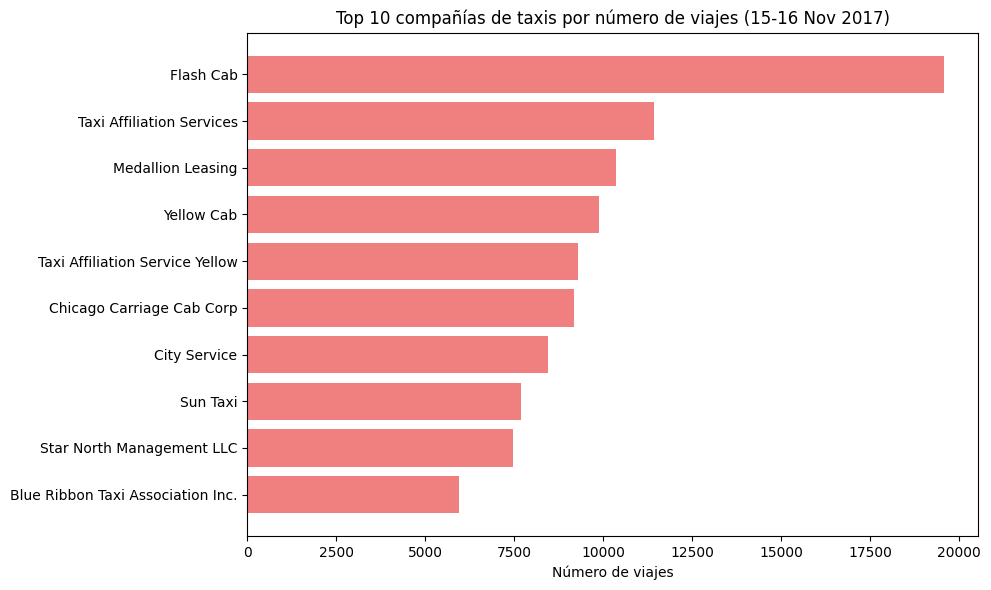

In [5]:
# Top compañias por número de viajes

# Ordenar por trips_amount de forma descendente y seleccionar las 10 primeras
top_10_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)
display(top_10_companies)

# Gráfica de barras Top compañias por número de viajes
plt.figure(figsize=(10,6))
plt.barh(top_10_companies['company_name'], top_10_companies['trips_amount'], color='lightcoral')
plt.xlabel('Número de viajes')
plt.title('Top 10 compañías de taxis por número de viajes (15-16 Nov 2017)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Observaciones top 10 compañías por número de viajes

* Flash Cab fue la empresa con mayor número de viajes por un margen significativo. Esto sugiere que tiene más taxis en circulación, mejor cobertura o más confianza de los usuarios.

* Hay una fuerte presencia de compañías asociadas “Taxi Affiliation Services” y “Taxi Affiliation Service Yellow”, lo cual puede indicar asociaciones estratégicas ya que suman más de 20,000 viajes.

* La competencia es muy reñida en el rango medio ya que empresas del puesto 3 al 5 tienen cantidades similares de viajes. Esto sugiere que hay varias compañías compitiendo de forma pareja en el mercado.

2) Cantidad de viajes para empresas que contengan "Yellow" o "Blue" en el nombre entre 1 y 7 de noviembre de 2017.

,company_name,trips_amount
0,Blue Diamond,6764
1,Blue Ribbon Taxi Association Inc.,17675
2,Taxi Affiliation Service Yellow,29213
3,Yellow Cab,33668


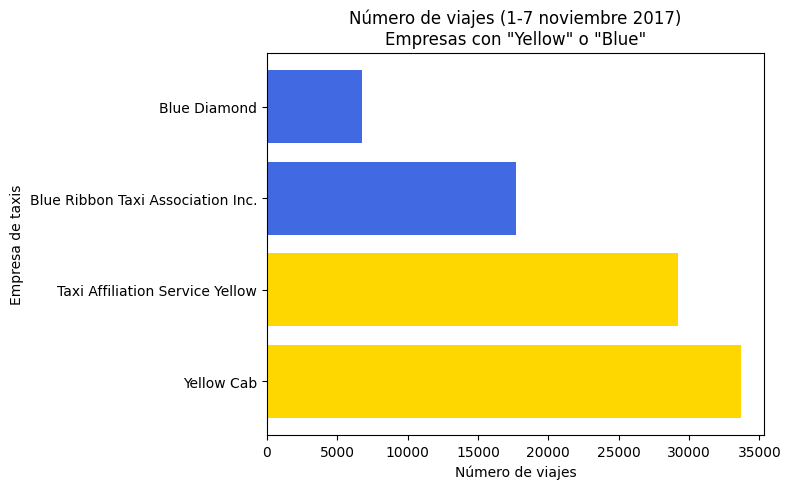

In [6]:
# Cargar archivo 
df_yellow_blue = pd.read_csv('data_yellow_blue.csv')

# Mostrar el DataFrame de asociaciones de yellow y blue
display(df_yellow_blue)

# Crear una lista de colores basada en el nombre de la empresa
colors = ['gold' if 'Yellow' in name else 'royalblue' for name in df_yellow_blue['company_name']]

# Crear gráfico de barras horizontales
plt.figure(figsize=(8, 5))
plt.barh(df_yellow_blue['company_name'], df_yellow_blue['trips_amount'], color=colors)
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.title('Número de viajes (1-7 noviembre 2017)\nEmpresas con "Yellow" o "Blue"')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Observaciones compañías con yellow y blue

Al analizar la gráfica y la presencia de compañías afiliadas, decidimos comparar específicamente aquellas cuya afiliación incluye los términos "Yellow" y "Blue". Esta comparación nos permitió observar que pertenecer a una asociación no garantiza necesariamente un mayor éxito en términos de número de viajes. De hecho, algunas compañías sin afiliación o con otro tipo de asociaciones muestran un desempeño superior, lo que sugiere que existen otros factores —más allá del nombre o afiliación— que influyen significativamente en el éxito de una empresa.

3) Viajes para Flash Cab, Taxi Affiliation Services y resto en "Other" del mes de noviembre.

,company,trips_amount
0,Other,335771
1,Flash Cab,64084
2,Taxi Affiliation Services,37583


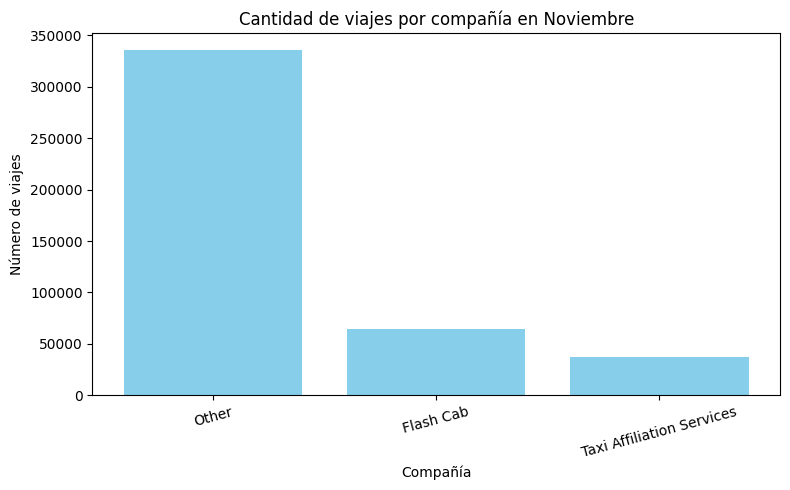

In [7]:

# Crear el DataFrame con los datos proporcionados
data = {
    'company': ['Other', 'Flash Cab', 'Taxi Affiliation Services'],
    'trips_amount': [335771, 64084, 37583]}

df_trips_nov = pd.DataFrame(data)

# Mostrar el DataFrame
display(df_trips_nov)

# Crear df
df_trips_nov.to_csv('top_companies_trips.csv', index=False)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(df_trips_nov['company'], df_trips_nov['trips_amount'], color='skyblue')
plt.title('Cantidad de viajes por compañía en Noviembre')
plt.xlabel('Compañía')
plt.ylabel('Número de viajes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Observaciones Viajes terminados por compañias agrupadas

Si comparamos los dos primeros lugares del ranking de compañías por cantidad de viajes completados con el resto, notamos que, el conjunto de todas las demás compañías en conjunto supera su número de viajes. Sin embargo, sigue siendo notable la alta cantidad de viajes realizados por "Flash Cab" y "Taxi Affiliation Services" individualmente.

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


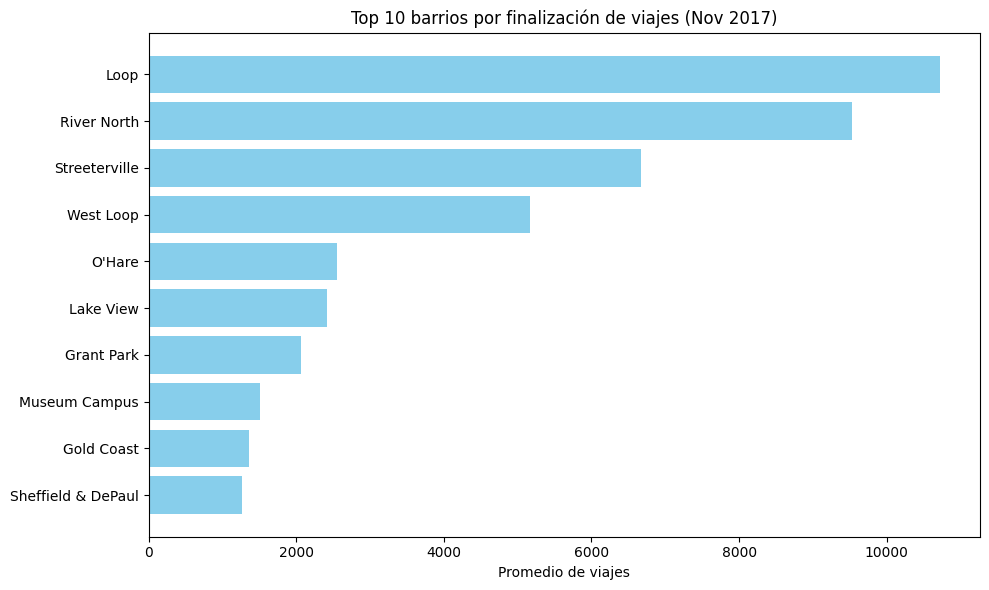

In [8]:
# Top 10 barrios por finalización de viajes

# Ordenar por average_trips de forma descendente y seleccionar los 10 principales barrios
top_10_barrios = df_dropoffs.sort_values(by='average_trips', ascending=False).head(10)
display(top_10_barrios)

# Gráfica de barras Top 10 barrios por finalización de viajes  
plt.figure(figsize=(10,6))
plt.barh(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'], color='skyblue')
plt.xlabel('Promedio de viajes')
plt.title('Top 10 barrios por finalización de viajes (Nov 2017)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Observaciones top 10 barrios por finalización de viajes

* Loop es claramente el punto más activo para la finalización de viajes, lo cual es lógico dado que es el centro financiero y comercial de Chicago.

* Los barrios con actividades turísticas y de negocios (como River North, Streeterville, y O’Hare) también tienen una alta demanda.

* La distribución sugiere que los pasajeros tienden a finalizar sus viajes en zonas céntricas o altamente transitadas.

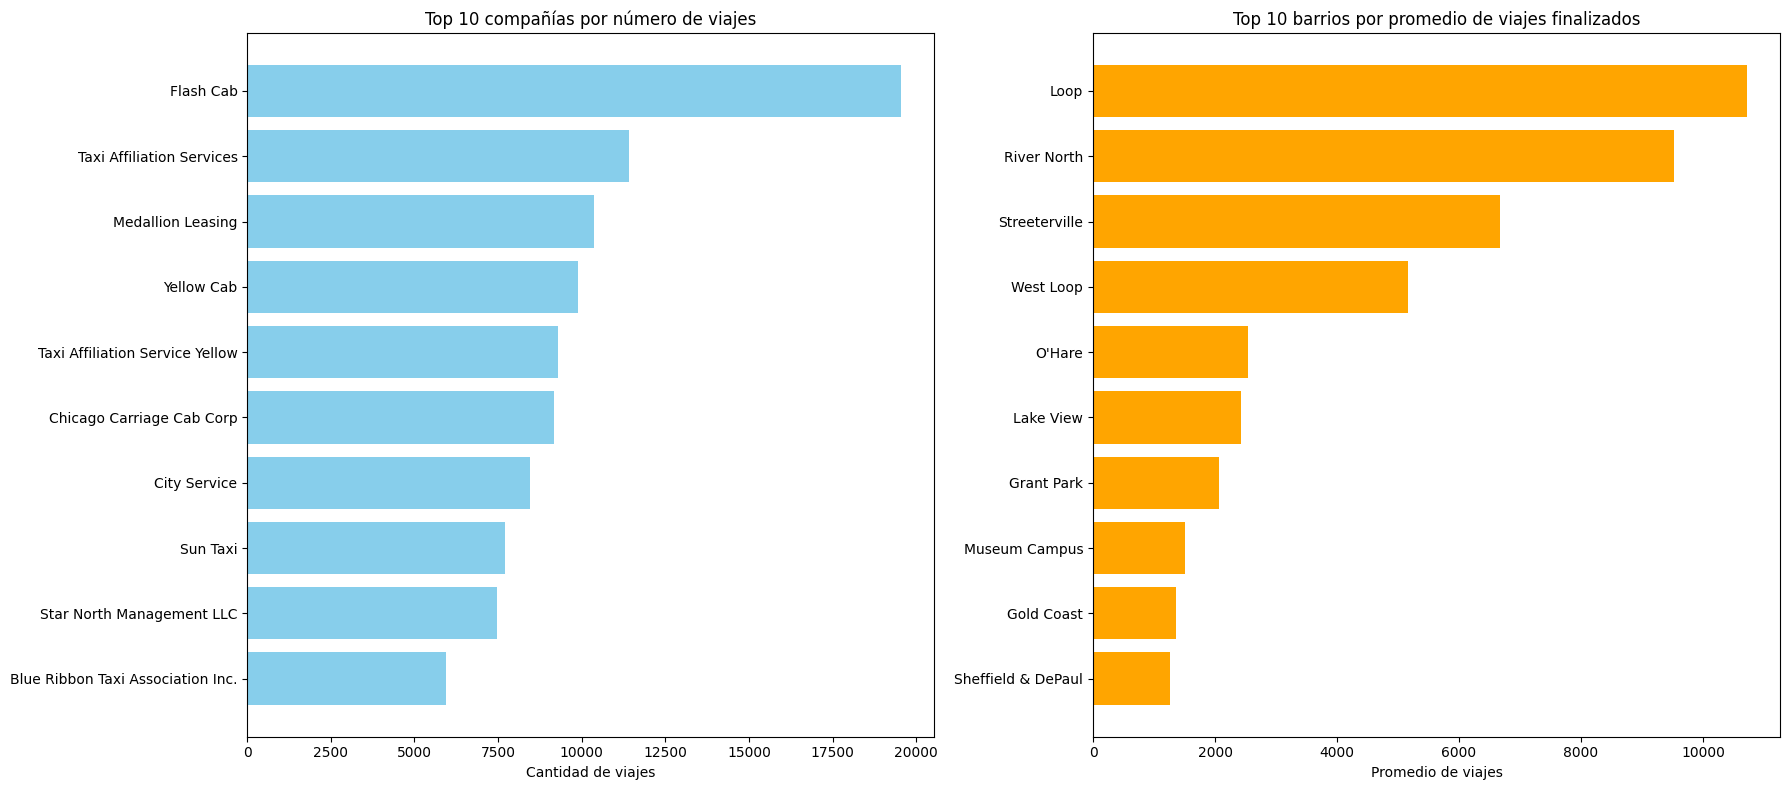

In [9]:
# Crear subgráficas para comparacion visual y encontrar realciones entre ambas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Gráfica 1: compañías
axes[0].barh(top_10_companies['company_name'], top_10_companies['trips_amount'], color='skyblue')
axes[0].invert_yaxis()
axes[0].set_title('Top 10 compañías por número de viajes')
axes[0].set_xlabel('Cantidad de viajes')

# Gráfica 2: barrios
axes[1].barh(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'], color='orange')
axes[1].invert_yaxis()
axes[1].set_title('Top 10 barrios por promedio de viajes finalizados')
axes[1].set_xlabel('Promedio de viajes')

plt.tight_layout()
plt.show()

## ¿Coinciden las compañías más activas con los barrios más activos?

Aunque Flash Cab domina en número de viajes, no tenemos un cruce directo que indique en qué barrios terminaron esos viajes. Sin embargo, es altamente probable que muchas de estas compañías estén centradas en Loop, River North y O’Hare, dado el volumen de tráfico.

Por lo que si se busca enfocar promociones o estrategias optaria por las compañías top como Flash Cab o Taxi Affiliation Services, ya que tienen un alcance masivo.

Así como, priorizar zonas como Loop y River North para posicionamiento publicitario, puntos de promoción o alianzas estratégicas.

No obstante sería buena idea analizar la cobertura de barrios menos activos, para identificar oportunidades de expansión o mejora de servicios.


# Prueba de hipótesis

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

* Hipótesis nula (H0): La duración promedio de los viajes los sábados no cambia si llueve.

* Hipótesis alternativa (H1): La duración promedio de los viajes los sábados cambia si llueve.

Notas: Como queremos comparar la media entre dos grupos independientes (sábados lluviosos vs. no lluviosos), usaremos una prueba de hipótesis para dos muestras independientes:

* Prueba t de Student para muestras independientes (scipy.stats.ttest_ind).

* Supondremos que la varianza puede ser diferente, por lo tanto usaremos el parámetro equal_var=False.

* Seleccionaremos un nivel de significación α = 0.05, un valor estándar en pruebas estadísticas.

In [10]:
# Crear columna con el nombre del día de la semana
df_weather_trips['day_name'] = df_weather_trips['start_ts'].dt.day_name()
display(df_weather_trips.head())
print(df_weather_trips['day_name'].unique())

,start_ts,weather_conditions,duration_seconds,day_name
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


['Saturday']


In [11]:
# Separar los sábados según condiciones climáticas
good_weather = df_weather_trips[df_weather_trips['weather_conditions'] == 'Good']
bad_weather = df_weather_trips[df_weather_trips['weather_conditions'] == 'Bad']

# Prueba de Levene para evaluar igualdad de varianzas
stat_levene, p_levene = levene(good_weather['duration_seconds'], bad_weather['duration_seconds'])

print(f'Estadístico Levene: {stat_levene:.3f}')
print(f'Valor p de Levene: {p_levene:.4f}')

# Determinar si se asumen varianzas iguales o no
if p_levene > 0.05:
    print("No se rechaza la hipótesis nula de Levene: se asumen varianzas iguales.")
    equal_var = True
else:
    print("Se rechaza la hipótesis nula de Levene: no se asumen varianzas iguales.")
    equal_var = False

# Prueba t de Student con ajuste de varianza según Levene
stat_ttest, p_ttest = ttest_ind(
    good_weather['duration_seconds'],
    bad_weather['duration_seconds'],
    equal_var=equal_var
)

# Mostrar resultados de la prueba t
print(f'Estadístico t: {stat_ttest:.3f}')
print(f'Valor p de prueba t: {p_ttest:.4f}')

# Evaluar hipótesis sobre la duración
alpha = 0.05
if p_ttest < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio sí cambia en sábados lluviosos.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para decir que la duración promedio cambia.")

Estadístico Levene: 0.389
Valor p de Levene: 0.5332
No se rechaza la hipótesis nula de Levene: se asumen varianzas iguales.
Estadístico t: -6.946
Valor p de prueba t: 0.0000
Rechazamos la hipótesis nula: la duración promedio sí cambia en sábados lluviosos.


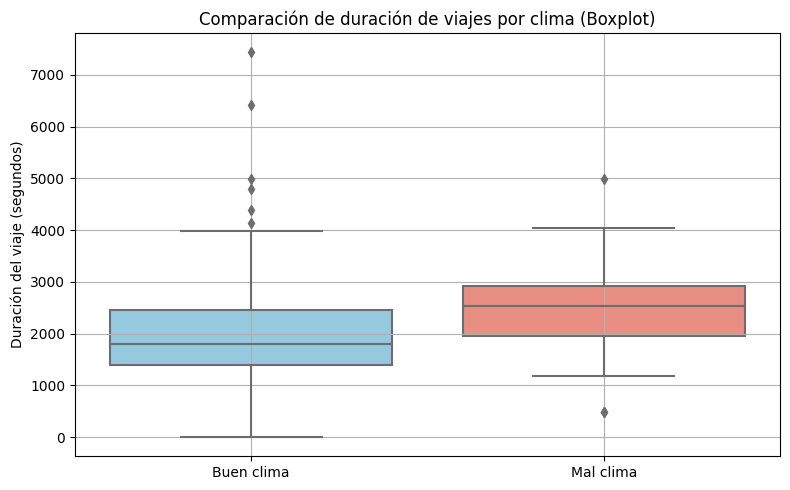

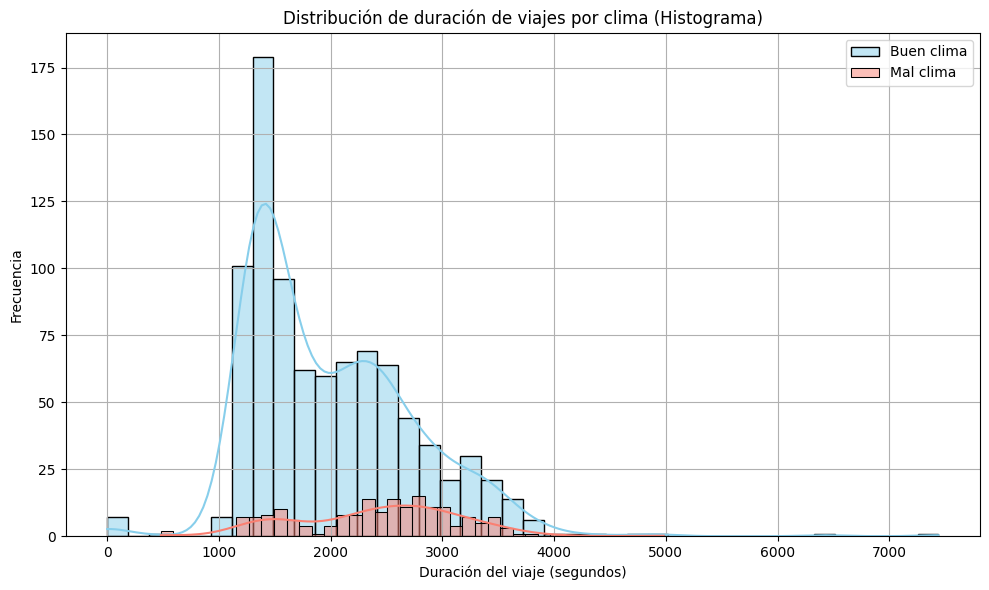

In [12]:
# ------------------------------
# BOX PLOT
# ------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=[good_weather['duration_seconds'], bad_weather['duration_seconds']],
    palette=["skyblue", "salmon"]
)
plt.xticks([0, 1], ['Buen clima', 'Mal clima'])
plt.title('Comparación de duración de viajes por clima (Boxplot)')
plt.ylabel('Duración del viaje (segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# HISTOGRAMA
# ------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(good_weather['duration_seconds'], bins=40, color='skyblue', label='Buen clima', kde=True)
sns.histplot(bad_weather['duration_seconds'], bins=40, color='salmon', label='Mal clima', kde=True)
plt.title('Distribución de duración de viajes por clima (Histograma)')
plt.xlabel('Duración del viaje (segundos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Observaciones de la hipótesis

Existe evidencia estadísticamente significativa de que los sábados lluviosos si afectan la duración promedio de los viajes entre el Loop y el aeropuerto O’Hare.

Esto puede deberse a varios factores:

* Tráfico más lento por menor visibilidad y precaución al conducir.

* Mayor congestión debido al incremento en la demanda de taxis y movilidad urbana alterada.

* Condiciones del camino que pueden volver el trayecto más lento (charcos, desvíos, accidentes menores, etc.).